# Исследование надежности заемщиков - анализ банковских данных

Заказчик — кредитный отдел банка. Входные данные от банка — выгрузка обезличенных данных о клиентах, содержащая в том числе статистику их платёжеспособности.

**Цель исследования**: Выяснить, влияет ли семейное положение, количество детей и уровень дохода клиента, а также цель кредита, на факт погашения кредита в срок. 
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Шаги иследования**:
- изучение общей информации
- предобработка данных
- исследование данных
- формирование общего вывода

# Содержание

* 1. Изучение общей информации
* 2. Предобработка данных
    * 2.1. Удаление пропусков
    * 2.2. Обработка аномальных значений
    * 2.3. Удаление пропусков (продолжение)
    * 2.4. Изменение типов данных
    * 2.5. Обработка дубликатов
    * 2.6. Категоризация данных
* 3. Исследование данных
    * 3.1. Зависимость между количеством детей и возвратом кредита в срок
    * 3.2. Зависимость между семейным положением и возвратом кредита в срок
    * 3.3. Зависимость между уровнем дохода и возвратом кредита в срок
    * 3.4. Зависимость между целью кредита и его возвратом в срок
* 4. Общий вывод

## Изучение общей информации о данных

Заранее подключим необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('data.csv')

Выведем первые 20 строк датафрейма

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме с помощью метода `info()`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропущенные значения есть в двух столбцах - `days_employed` и `total_income`. Сначала разберемся с `total_income` - в нем хранятся данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце можно медианным значением по каждому типу из столбца `income_type`. 

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных встречаются артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Как можно было увидеть на этапе изучения общей информации, таким артефактом является отрицательное количество дней трудового стажа в столбце `days_employed`. Обработаем значения в этом столбце, заменив все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Но для исправления этих значений нет данных. К счастью, для данного исследования эти данные не понадобятся

Выведем перечень уникальных значений столбца `children`.

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения: 20 и -1. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. 

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Выведем на экран количество строк-дубликатов в данных и удалим их, если таковые имеются

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру. 

In [16]:
data['education'] = data['education'].str.lower()

### Категоризация данных

Создадим в датафрейме `data` отдельный столбец `total_income_category` с категориями, определенными на основании ежемесяного дохода клиента:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных

### Зависимость между количеством детей и возвратом кредита в срок

Для определения зависимости между количеством детей и возвратом кредита в срок необходимо для каждой группы, выделенной по количеству детей, определить конверсию как отношение количества должников к общему количеству заемщиков. При этом, для объективности, необходимо также получить для каждой группы данные отдельно по общему количеству должников и общему количеству заемщиков (возможно, данных по какой-то группе мало,и выборка будет не объективна). С этой целью написана функция func_convers, принимающая датафрейм и количество детей, и возвращающая список из четырех значений: количество детей у заемщика, количество должников, общее количество заемщиков и конверсия.

In [22]:
def func_convers(data, quant_child):
    vsego = data.loc[data['children'] == quant_child, 'debt'].count()
    dolg = data.loc[data['children'] == quant_child, 'debt'].sum()
    return [quant_child, dolg, vsego, (dolg / vsego) * 100]

Функция применена в цикле, на выходе которго получаем 3 списка: список количества детей, список конверсий и список, содержащий в себе списки с полной информацией. Первые два будут использованы для графика, третий - для итоговой таблицы.

In [23]:
child, convers, x = [], [], []
for i in data['children'].unique():
    child.append(i)
    convers.append(func_convers(data, i)[3])
    x.append(func_convers(data, i))

Построим график, отображающий распределение конверсий

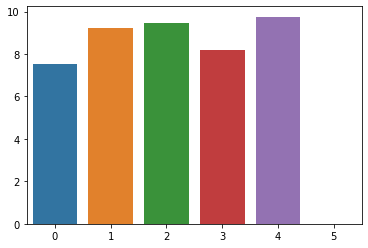

In [24]:
sns.barplot(x=child, y=convers);

Далее, построим итоговую таблицу

In [25]:
y = ['Дети', 'Количество должников', 'Количество заемщиков', 'Конверсия']
pd.DataFrame(data=x, columns=y).sort_values(by='Дети')

,Дети,Количество должников,Количество заемщиков,Конверсия
1,0,1063,14107,7.535266
0,1,444,4809,9.232689
3,2,194,2052,9.454191
2,3,27,330,8.181818
4,4,4,41,9.756098
5,5,0,9,0.000000


Таблица дает понимание, что выборка по количеству детей "4" и "5" не объективна - слишком мало данных.

**Вывод:** 

Между количеством детей у заемщика и возвратом кредита в срок, прослеживается определенная взаимосвязь
Доля просроченных платежей составлет:
- для заемщиков без детей - 7,53 %
- для заемщиков с 3 детьми - 8,18 %
- для заемщиков с 1 ребенком - 9,23 %
- для заемщиков с 2 детьми - 9,45 %

Таким образом, наименее надежны заемщики с 1-2 детьми. Наиболее надежны заемщики без детей.

Для заемщиков с 4 и 5 детьми - недостаточно данных, чтобы получить объективную картину.

### Зависимость между семейным положением и возвратом кредита в срок

Для определения зависимости между семейным положением и возвратом кредита в срок необходимо для каждой группы, выделенной по семейному положению, определить конверсию как отношение количества должников к общему количеству заемщиков. При этом, для объективности, необходимо также получить для каждой группы данные отдельно по общему количеству должников и общему количеству заемщиков (возможно, данных по какой-то группе мало,и выборка будет не объективна). С этой целью используется функция func_convers_fam, принимающая датафрейм и семейное положение, и возвращающая список из четырех значений: семейное положение заемщика, количество должников, общее количество заемщиков и конверсия.

In [26]:
def func_convers_fam(data, fam_stat):
    vsego = data.loc[data['family_status'] == fam_stat, 'debt'].count()
    dolg = data.loc[data['family_status'] == fam_stat, 'debt'].sum()
    return [fam_stat, dolg, vsego, (dolg / vsego) * 100]

Функция применена в цикле, на выходе которго получаем 3 списка: список семейных положений, список конверсий и список, содержащий в себе списки с полной информацией. Первые два будут использованы для графика, третий - для итоговой таблицы.

In [27]:
fam, convers, x = [], [], []
for i in data['family_status'].unique():
    fam.append(i)
    convers.append(func_convers_fam(data, i)[3])
    x.append(func_convers_fam(data, i))

Построим график, отображающий распределение конверсий

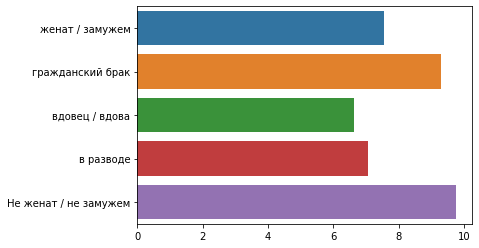

In [28]:
sns.barplot(y=fam, x=convers);

Далее, построим итоговую таблицу

In [29]:
y = ['Семейное положение', 'Количество должников', 'Количество заемщиков', 'Конверсия']
pd.DataFrame(data=x, columns=y).sort_values(by='Конверсия')

,Семейное положение,Количество должников,Количество заемщиков,Конверсия
2,вдовец / вдова,63,951,6.624606
3,в разводе,84,1189,7.064760
0,женат / замужем,927,12266,7.557476
1,гражданский брак,385,4146,9.286059
4,Не женат / не замужем,273,2796,9.763948


График и таблица не показывают аномальных значений

**Вывод:** 

Между семейным положением и возвратом кредита в срок прослеживается определенная зависимость. 
Доля просроченных платежей составляет:
- вдовец/вдова - 6,62 %
- в разводе - 7,06 %
- женат/замужем - 7,56 %
- гражданский брак - 9,29 %
- не женат / не замужем - 9,76 %

Т.е. наибольший риск просрочки имеется у не женатых / не замужних заемщиков. 

### Зависимость между уровнем дохода и возвратом кредита в срок

Для определения зависимости между уровнем дохода и возвратом кредита в срок необходимо для каждой группы, выделенной по уровню дохода, определить конверсию как отношение количества должников к общему количеству заемщиков. При этом, для объективности, необходимо также получить для каждой группы данные отдельно по общему количеству должников и общему количеству заемщиков (возможно, данных по какой-то группе мало,и выборка будет не объективна). С этой целью используется функция func_convers_dohod, принимающая датафрейм и уровень дохода, и возвращающая список из четырех значений: уровень дохода заемщика, количество должников, общее количество заемщиков и конверсия.

In [30]:
def func_convers_dohod(data, dohod):
    vsego = data.loc[data['total_income_category'] == dohod, 'debt'].count()
    dolg = data.loc[data['total_income_category'] == dohod, 'debt'].sum()
    return [dohod, dolg, vsego, (dolg / vsego) * 100]

Функция применена в цикле, на выходе которго получаем 3 списка: список уровней дохода, список конверсий и список, содержащий в себе списки с полной информацией. Первые два будут использованы для графика, третий - для итоговой таблицы.

In [31]:
dohod, convers, x = [], [], []
for i in data['total_income_category'].unique():
    dohod.append(i)
    convers.append(func_convers_dohod(data, i)[3])
    x.append(func_convers_dohod(data, i))

Построим график, отображающий распределение конверсий

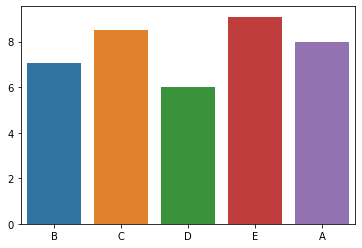

In [32]:
sns.barplot(x=dohod, y=convers);

Далее, построим итоговую таблицу

In [33]:
y = ['Уровень дохода', 'Количество должников', 'Количество заемщиков', 'Конверсия']
pd.DataFrame(data=x, columns=y).sort_values(by='Уровень дохода')

,Уровень дохода,Количество должников,Количество заемщиков,Конверсия
4,A,2,25,8.000000
0,B,354,5014,7.060231
1,C,1353,15938,8.489145
2,D,21,349,6.017192
3,E,2,22,9.090909


Таблица дает понимание, что по уровню дохода A, D и E выборка необъективна - слишком мало данных.

**Вывод:** 

Имеющиеся данные не позволяют выявить существенную зависимость возврата кредита в срок от уровня дохода. Доля просроченных платежей составляет:
- Категория B - 7,06 %
- Категория C - 8,49 %

Для остальных категорий, данных недостаточно

### Зависимость между целью кредита и его возвратом в срок

Для определения зависимости между целью и возвратом кредита в срок необходимо для каждой группы, выделенной по цели кредита, определить конверсию как отношение количества должников к общему количеству заемщиков. При этом, для объективности, необходимо также получить для каждой группы данные отдельно по общему количеству должников и общему количеству заемщиков (возможно, данных по какой-то группе мало,и выборка будет не объективна). С этой целью используется функция func_convers_purp, принимающая датафрейм и цель кредита, и возвращающая список из четырех значений: цель кредита, количество должников, общее количество заемщиков и конверсия.

In [34]:
def func_convers_purp(data, purp):
    vsego = data.loc[data['purpose_category'] == purp, 'debt'].count()
    dolg = data.loc[data['purpose_category'] == purp, 'debt'].sum()
    return [purp, dolg, vsego, (dolg / vsego) * 100]

Функция применена в цикле, на выходе которго получаем 3 списка: список целей кредита, список конверсий и список, содержащий в себе списки с полной информацией. Первые два будут использованы для графика, третий - для итоговой таблицы.

In [35]:
purp, convers, x = [], [], []
for i in data['purpose_category'].unique():
    purp.append(i)
    convers.append(func_convers_purp(data, i)[3])
    x.append(func_convers_purp(data, i))

Построим график, отображающий распределение конверсий

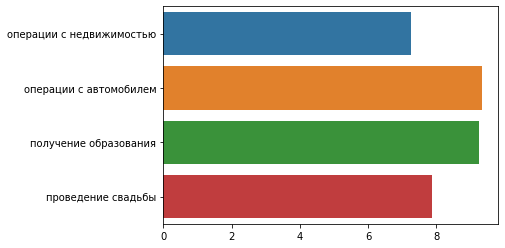

In [36]:
sns.barplot(y=purp, x=convers);

Далее, построим итоговую таблицу

In [37]:
y = ['Цель кредита', 'Количество должников', 'Количество заемщиков', 'Конверсия']
pd.DataFrame(data=x, columns=y).sort_values(by='Конверсия')

,Цель кредита,Количество должников,Количество заемщиков,Конверсия
0,операции с недвижимостью,780,10754,7.253115
3,проведение свадьбы,183,2324,7.874355
2,получение образования,369,3989,9.250439
1,операции с автомобилем,400,4281,9.343611


Аномальных значений в таблице нет

**Вывод:** 

Имеющиеся данные указывают на определенную взаимосвязь между целью кредита и возвратом в срок. 
Доля просроченных платежей для каждой категории составляет:
- операции с недвижимостью - 7,25 %
- проведение свадьбы - 7,87 %
- получение образования - 9,25 %
- операции с автомобилем - 9,34 %

То есть, наименее надежными заемщиками являются те, кто берет кредит на образование или операции с автомобилем. Наиболее надежные - те, кто берет кредит на операции с недвижимостью.

## Общий вывод

Было проведено исследование, с целью выявления закономерностей между различными характеристиками заемщика и вероятностью несвоевременного погашения им кредита. В качестве входных данных использовалась обезличенная информация о заемщиках.

Целью исследования являлась проверка обоснованности 4-х гипотез:

-	Гипотеза 1: Имеется зависимость между количеством детей заемщика и своевременностью возврата им кредита
-	Гипотеза 2: Имеется зависимость между семейным положением заемщика и своевременностью возврата им кредита
-	Гипотеза 3: Имеется зависимость между уровнем дохода заемщика и своевременностью возврата им кредита
-	Гипотеза 4: Имеется зависимость между целью взятия кредита заемщиком и своевременностью возврата им кредита

В ходе анализа установлено:

**Гипотеза 1 подтверждена.**

Между количеством детей у заемщика и возвратом кредита в срок, прослеживается взаимосвязь.

Доля просроченных платежей составлет:

-	для заемщиков без детей - 7,53 %
-	для заемщиков с 3 детьми - 8,18 %
-	для заемщиков с 1 ребенком - 9,23 %
-	для заемщиков с 2 детьми - 9,45 %

Таким образом, наиболее надежны заемщики без детей. 
Наименее надежны заемщики с 1-2 детьми.
Для заемщиков с 4 и 5 детьми - недостаточно данных, чтобы получить объективную картину.

**Гипотеза 2 подтверждена.**

Между семейным положением и возвратом кредита в срок, прослеживается зависимость.

Доля просроченных платежей составляет:

-	вдовец/вдова - 6,62 %
-	в разводе - 7,06 %
-	женат/замужем - 7,56 %
-	гражданский брак - 9,29 %
-	не женат / не замужем - 9,76 %

Таким образом, наиболее надежны заемщики в разводе или вдовцы/вдовы. 
Наименее надежны неженатые / незамужние заемщики.

**Гипотеза 3 не подтверждена (недостаточно данных).**

Имеющиеся данные не позволяют выявить существенную зависимость возврата кредита в срок от уровня дохода.

Доля просроченных платежей составляет:

-	Категория B (доход 200 001 - 1 000 000) - 7,06 %
-	Категория C (доход 50 001 - 200 000)- 8,49 %

Чтобы получить объективные значения для других категорий и сделать общие выводы, данных недостаточно.

**Гипотеза 4 подтверждена.**

Между целью кредита и возвратом в срок, прослеживается зависимость.

Доля просроченных платежей для каждой категории составляет:

-	операции с недвижимостью - 7,25 %
-	проведение свадьбы - 7,87 %
-	получение образования - 9,25 %
-	операции с автомобилем - 9,34 %

Таким образом, наиболее надежны заемщики, которые берут кредит на операции с недвижимостью. 
Наименее надежны заемщики, которые берут кредит на образование или операции с автомобилем.

**Общие рекомендации.**
1.	Рекомендуется провести дополнительный сбор данных для уточнения Гипотез 1 и 3.
2.	При принятии решения о кредитоспособности заемщика, рекомендуется опираться на совокупность выводов из нескольких гипотез. (Поскольку расхождения по каждой гипотезе в отдельности не являются ярко выраженными)